---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_annot.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a> -->

## 📈🔖Annotating visualisations.

In [1]:
# installing the required roux subpackage
# !pip install roux[viz]
# loading requirements
import matplotlib.pyplot as plt
## for saving plots
from roux.viz.io import to_plot

### Example of annotated scatter plot

In [2]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
df1.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


'/mnt/d/Documents/code/roux/examples/outputs/roux_viz_annot/annot_side.png'

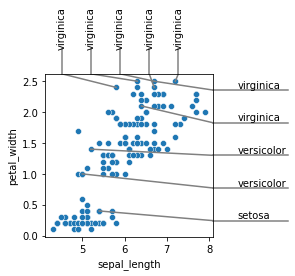

In [3]:
# plot
_,ax=plt.subplots(figsize=[3,3])
ax=sns.scatterplot(data=df1,x='sepal_length',y='petal_width',ax=ax)
from roux.viz.annot import annot_side
## left
ax=annot_side(ax=ax,
           df1=df1.sample(5),
           colx='sepal_length',coly='petal_width',cols='species',length_axhline=1.3)
## top
ax=annot_side(ax=ax,
           df1=df1.sort_values('petal_width',ascending=False).head(5),
           colx='sepal_length',coly='petal_width',cols='species',length_axhline=1,
           loc='top',)
to_plot('outputs/roux_viz_annot/annot_side.png')

#### Documentation
[`roux.viz.annot`](https://github.com/rraadd88/roux#module-rouxvizannot)

### Example of annotated histogram

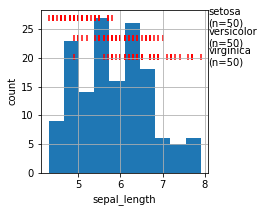

In [4]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')

# plot
_,ax=plt.subplots(figsize=[3,3])
from roux.viz.dist import hist_annot
ax=hist_annot(
    df1,colx='sepal_length',colssubsets=['species'],bins=10,
    params_scatter=dict(marker='|',alpha=1),
    ax=ax)
# to_plot('outputs/roux_viz_annot/hist_annot.png')

#### Documentation
[`roux.viz.dist`](https://github.com/rraadd88/roux#module-rouxvizdist)

### Example of annotated heatmap

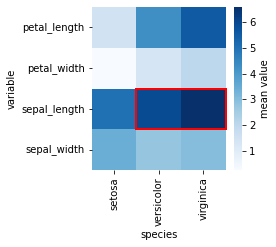

In [5]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
data=(df1
    .set_index('species')
    .melt(ignore_index=False)
    .reset_index()
    .pivot_table(index='variable',columns='species',values='value',aggfunc='mean'))

# plot
_,ax=plt.subplots(figsize=[3,3])
ax=sns.heatmap(data,
    cmap='Blues',
    cbar_kws=dict(label='mean value'),
    ax=ax,)
from roux.viz.annot import show_box
ax=show_box(ax=ax,xy=[1,2],width=2,height=1,ec='red',lw=2)
# to_plot('outputs/roux_viz_annot/show_box.png')

#### Documentation
[`roux.viz.heatmap`](https://github.com/rraadd88/roux#module-rouxvizheatmap)

### Example of annotated distributions

#### Annotated points within distributions

In [6]:
# demo data
data=df1.assign(**{
    'annotations':lambda df: df.apply(lambda x: 'a' if (x['sepal_length']>5.75 and x['sepal_length']<6) else 'b' if (x['sepal_length']>5.5 and x['sepal_length']<5.75) else None,axis=1),
    'id':range(len(df1)),
})
print(data['annotations'].value_counts())
data.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,annotations,id
0,5.1,3.5,1.4,0.2,setosa,None,0


'/mnt/d/Documents/code/roux/examples/outputs/roux_viz_annot/plot_dists.png'

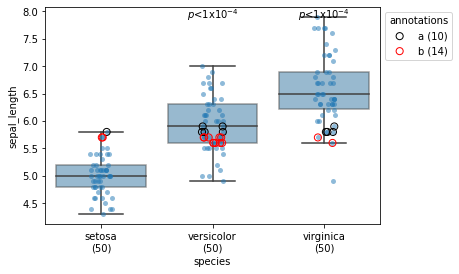

In [7]:
## plot
from roux.viz.dist import plot_dists
ax=plot_dists(
    data,x='species',y='sepal_length',colindex='id',kind=['box','strip'],
    show_outlines='annotations',
    kws_outlines=dict(
        outline_colors={'a':'k','b':'r'},
        legend=True,
        kws_legend=dict(bbox_to_anchor=[1,1]),
    ),              
)
to_plot('outputs/roux_viz_annot/plot_dists.png')

#### Documentation
[`roux.viz.dist`](https://github.com/rraadd88/roux#module-rouxvizdist)

### Example of annotated barplot

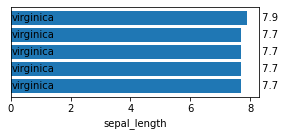

In [8]:
# plot
from roux.viz.bar import plot_barh
ax=plot_barh(df1.sort_values('sepal_length',ascending=False).head(5),
          colx='sepal_length',coly='species',colannnotside='sepal_length')
# to_plot('outputs/roux_viz_annot/plot_barh.png')

#### Documentation
[`roux.viz.annot`](https://github.com/rraadd88/roux#module-rouxvizannot)